# Multi-Class Prediction of Obesity Risk

Original dataset for data information: 
https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

In [1]:
# Optuna is a hyperparameter optimization framework, useful for tuning
# machine learning model parameters for better performance.
!pip install --quiet optuna

In [4]:
# Import necessary libraries for data analysis, visualization, machine learning, and hyperparameter tuning
import optuna                               # For hyperparameter optimization
import warnings                             # To handle warnings
import numpy as np                          # For numerical computations
import pandas as pd                         # For data manipulation
import seaborn as sns                       # For data visualization
import xgboost as xgb                       # XGBoost model

import lightgbm as lgb                      # LightGBM model
import tensorflow as tf                     # For deep learning models
import matplotlib.pyplot as plt             # For plotting
from keras_tuner import Hyperband           # For hyperparameter tuning with Keras models
from tensorflow.keras import layers, Model  # For building deep learning models

# Import modules from scikit-learn for data processing and evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


The attributes related with eating habits are: 
<ul>
    <li>Frequent consumption of high caloric food (FAVC)</li>
    <li>Frequency of consumption of vegetables (FCVC)</li>
    <li>Number of main meals (NCP)</li>
    <li>Consumption of food between meals (CAEC)</li>
    <li>Consumption of water daily (CH20)</li>
    <li>Consumption of alcohol (CALC)</li>
</ul>
The attributes related with the physical condition are: 
<ul>
    <li>Calories consumption monitoring (SCC)</li>
    <li>Physical activity frequency (FAF)</li>
    <li>Time using technology devices (TUE)</li>
    <li>Transportation used (MTRANS)</li>
</ul>
Variables obtained :
<ul>
    <li>Gender, Age, Height and Weight</li>
</ul>
NObesity values are:
<ul>
    <li>Underweight Less than 18.5</li>
    <li>Normal 18.5 to 24.9</li>
    <li>Overweight 25.0 to 29.9</li>
    <li>Obesity I 30.0 to 34.9</li>
    <li>Obesity II 35.0 to 39.9</li>
    <li>Obesity III Higher than 40</li>
</ul>

## 1. Data exploration

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head(10)

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   
5   5    Male  18.128249  1.748524   51.552595                            yes   
6   6    Male  29.883021  1.754711  112.725005                            yes   
7   7    Male  29.891473  1.750150  118.206565                            yes   
8   8    Male  17.000000  1.700000   70.000000                             no   
9   9  Female  26.000000  1.638836  111.275646                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573   no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000   no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378   no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061   no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848   no  1.967973   
5  yes  2.919751  3.000000   Sometimes    no  2.137550   no  1.930033   
6  yes  1.991240  3.000000   Sometimes    no  2.000000   no  0.000000   
7  yes  1.397468  3.000000   Sometimes    no  2.000000   no  0.598655   
8  yes  2.000000  3.000000   Sometimes    no  3.000000  yes  1.000000   
9  yes  3.000000  3.000000   Sometimes    no  2.632253   no  0.000000   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  
5  1.000000  Sometimes  Public_Transportation  Insufficient_Weight  
6  0.696948  Sometimes             Automobile      Obesity_Type_II  
7  0.000000  Sometimes             Automobile      Obesity_Type_II  
8  1.000000         no  Public_Transportation   Overweight_Level_I  
9  0.218645  Sometimes  Public_Transportation     Obesity_Type_III

In [6]:
df_train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

Get dataframe information

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Get total of nans

In [8]:
df_train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## 2. Data Visualization

##### Order Obesity to get intuitive visualizations:

In [9]:
# Define column names and titles for various health-related features
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]
titles = ["Frequency of consumption of vegetables", "Number of main meals",
          "Consumption of water daily", "Physical activity frequency", "Time using technology devices"]

# Define a dictionary to reduce obesity categories for easier readability
categories_reduced = {
    "Normal_Weight": "Normal",
    "Insufficient_Weight": "Insuf.",
    "Overweight_Level_I": "OW_I",
    "Overweight_Level_II": "OW_II",
    "Obesity_Type_I": "OB_I",
    "Obesity_Type_II": "OB_II",
    "Obesity_Type_III": "OB_III"
}

# Define the ordered obesity categories for consistent sorting
obesity_order = ["Insuf.", "Normal", "OW_I", "OW_II", "OB_I", "OB_II", "OB_III"]

# Map and reduce the obesity category labels in the dataset
df_train["NObeyesdadReduced"] = df_train["NObeyesdad"].apply(lambda x: categories_reduced[x])

# Convert the reduced obesity labels to a categorical type with a specified order
df_train['NObeyesdadReduced'] = pd.Categorical(df_train['NObeyesdadReduced'], categories=obesity_order, ordered=True)

#### 2.1 Transport used in different age ranges:

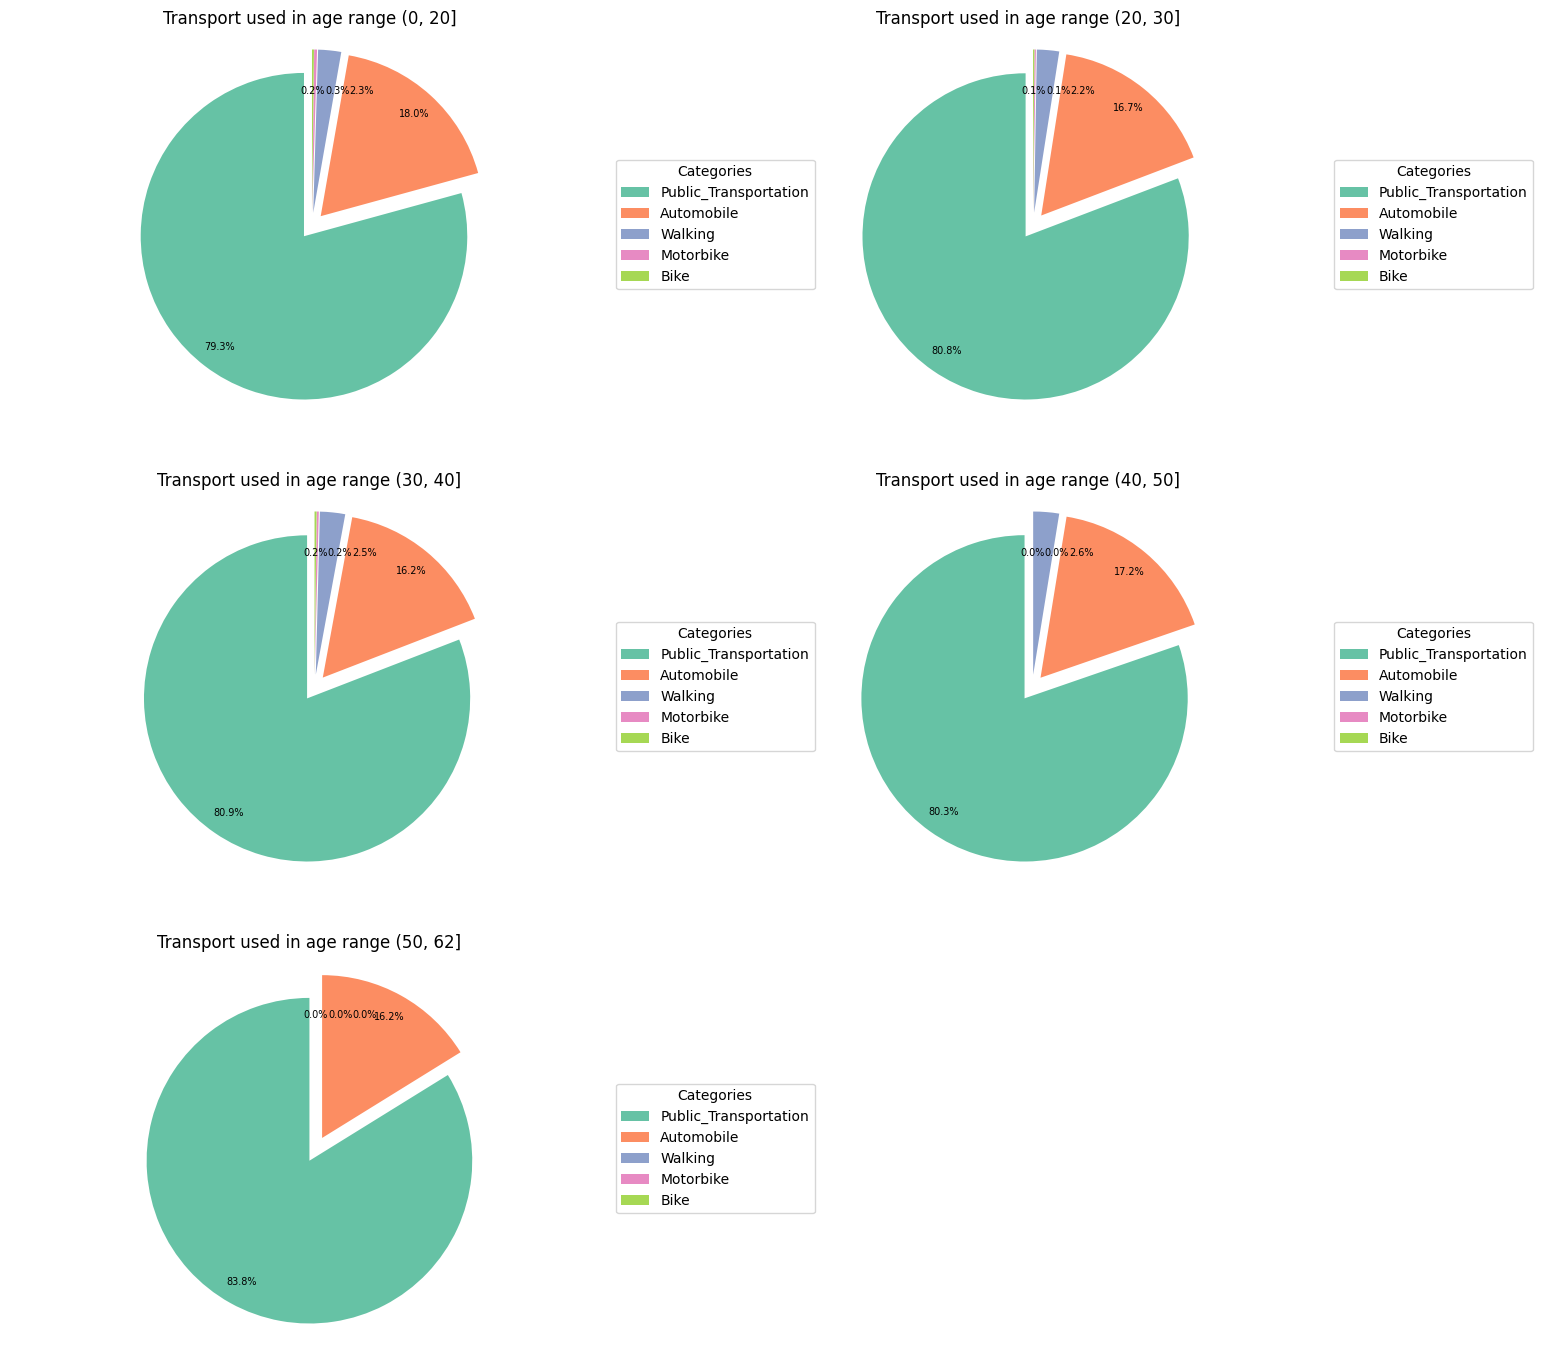

In [10]:
# Create age groups in the dataset and sort them for consistency
df_train["AgeRanges"] = sorted(pd.cut(df_train['Age'], [0, 20, 30, 40, 50, 62]).astype(str))
age_ranges = df_train["AgeRanges"].unique()  
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17, 17))  

# Define transport method labels and appearance settings for the pie chart
transport_labels = df_train["MTRANS"].unique()
explode = [0.08] * len(transport_labels)  # Offset slices slightly for visual effect
ax = ax.flatten()  # Flatten axes array for easy indexing

# Create a pie chart for each age group
for index, age_range in enumerate(age_ranges):
    df_filtered = df_train[df_train["AgeRanges"] == age_range]  # Filter data by age range
    data = df_filtered["MTRANS"].value_counts().reindex(transport_labels, fill_value=0)  # Count transport usage
    
    # Generate pie chart
    wedges, texts, autotexts = ax[index].pie(data, autopct='%1.1f%%', startangle=90, explode=explode,
                                             textprops={'fontsize': 10}, labeldistance=1.2, pctdistance=0.85,
                                             colors=sns.color_palette('Set2'))
    
    # Adjust font sizes and positions for some labels
    for autotext in autotexts:
        autotext.set_fontsize(7)
    x, y = autotext.get_position()
    autotexts[2].set_position((x+0.3, y-0.1))
    autotexts[3].set_position((x+0.15, y-0.1))
    autotexts[4].set_position((x, y-0.1))
    
    
    ax[index].legend(wedges, transport_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax[index].axis('equal')  
    ax[index].set_title(f"Transport used in age range {age_range}")

# Remove any empty subplot space and display the plot
fig.delaxes(ax[5])
plt.show()

#### 2.2 Types of transport used depending on the type of obesity

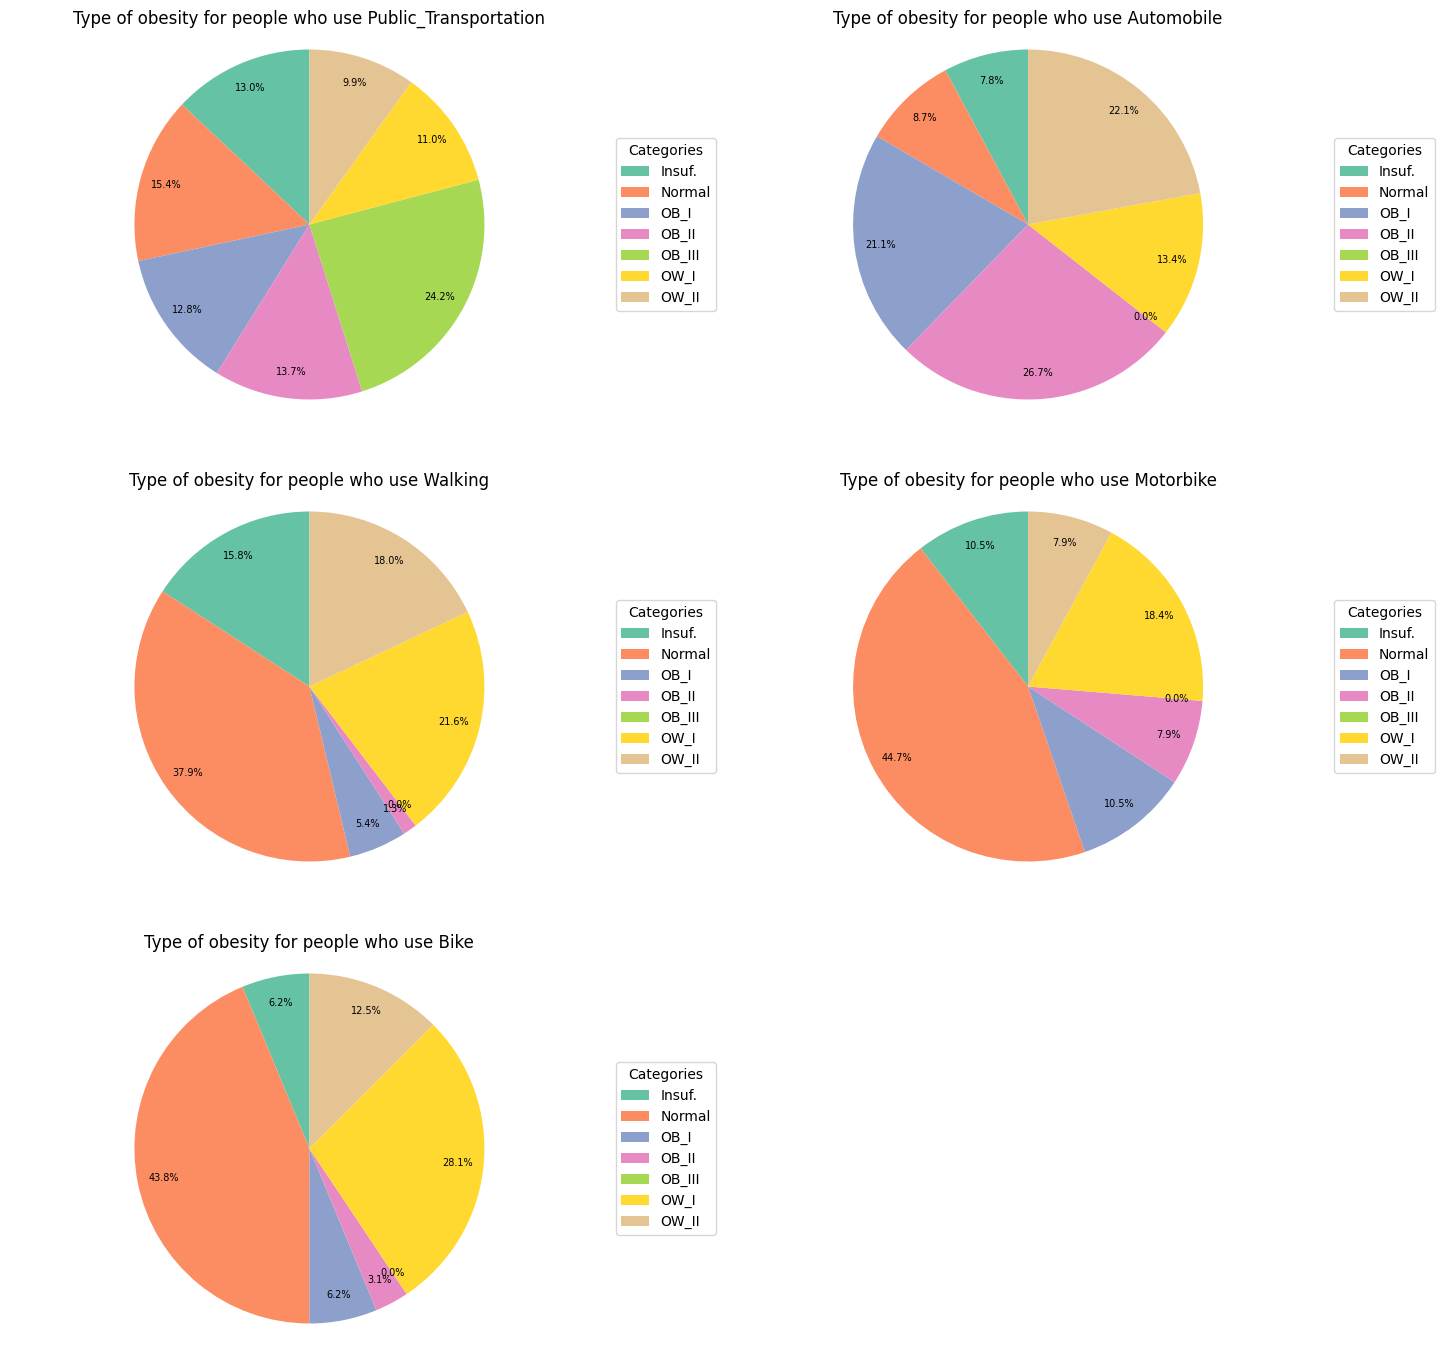

In [11]:
# Define unique obesity and transport labels for chart categories
obesity_labels = sorted(df_train["NObeyesdadReduced"].unique())
transport_labels = df_train["MTRANS"].unique()

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17, 17))  
ax = ax.flatten()  # Flatten the axes array for easy indexing

sns.color_palette("Set3")  # Set color palette for pie charts

# Create a pie chart for each transport method
for index, transport in enumerate(transport_labels):
    df_filtered = df_train[df_train["MTRANS"] == transport]  # Filter data by transport type
    data = df_filtered["NObeyesdadReduced"].value_counts().reindex(obesity_labels, fill_value=0)  # Count obesity categories
    
    # Generate pie chart 
    wedges, texts, autotexts = ax[index].pie(data, autopct='%1.1f%%', startangle=90, 
                                             textprops={'fontsize': 10}, labeldistance=1.2, 
                                             pctdistance=0.85, colors=sns.color_palette('Set2'))
    
    # Adjust font sizes for percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(7)
    
    
    ax[index].legend(wedges, obesity_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax[index].axis('equal')  
    ax[index].set_title(f"Type of obesity for people who use {transport}")

# Remove any extra subplot space and display the plot
fig.delaxes(ax[5])
plt.show()

#### 2.3 Percentage of people with obesity depending on its family

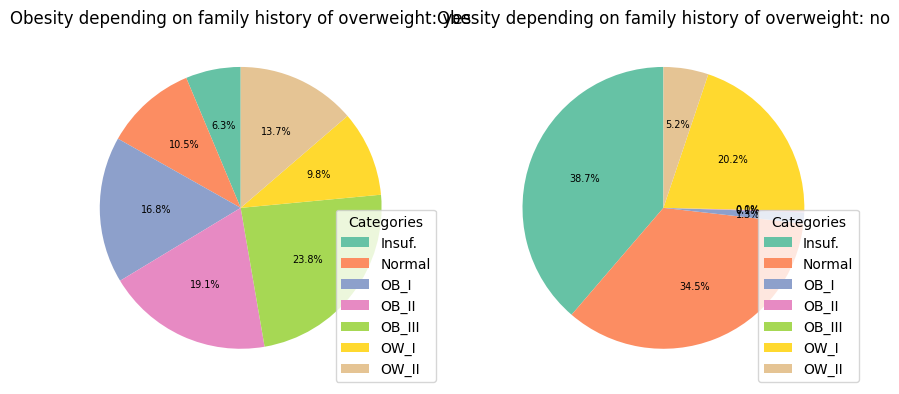

In [12]:
# Define unique obesity and family history labels for chart categories
obesity_labels = sorted(df_train["NObeyesdadReduced"].unique())
family_labels = df_train["family_history_with_overweight"].unique()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10)) 
ax = ax.flatten()  # Flatten axes array for easy indexing

# Create a pie chart for each family history category
for index, family in enumerate(family_labels):
    df_filtered = df_train[df_train["family_history_with_overweight"] == family]  # Filter by family history
    data = df_filtered["NObeyesdadReduced"].value_counts().reindex(obesity_labels, fill_value=0)  # Count obesity categories
    
    wedges, texts, autotexts = ax[index].pie(data, autopct='%1.1f%%', startangle=90, 
                                             textprops={'fontsize': 10}, colors=sns.color_palette('Set2'))
    
    # Adjust font sizes for percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(7)
    
    ax[index].legend(wedges, obesity_labels, title="Categories", loc="center left", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
    ax[index].set_title(f"Obesity depending on family history of overweight: {family}")

plt.show()  # Display the plot

#### 2.4 Mean frequency of various lifestyle variables depending on obesity:

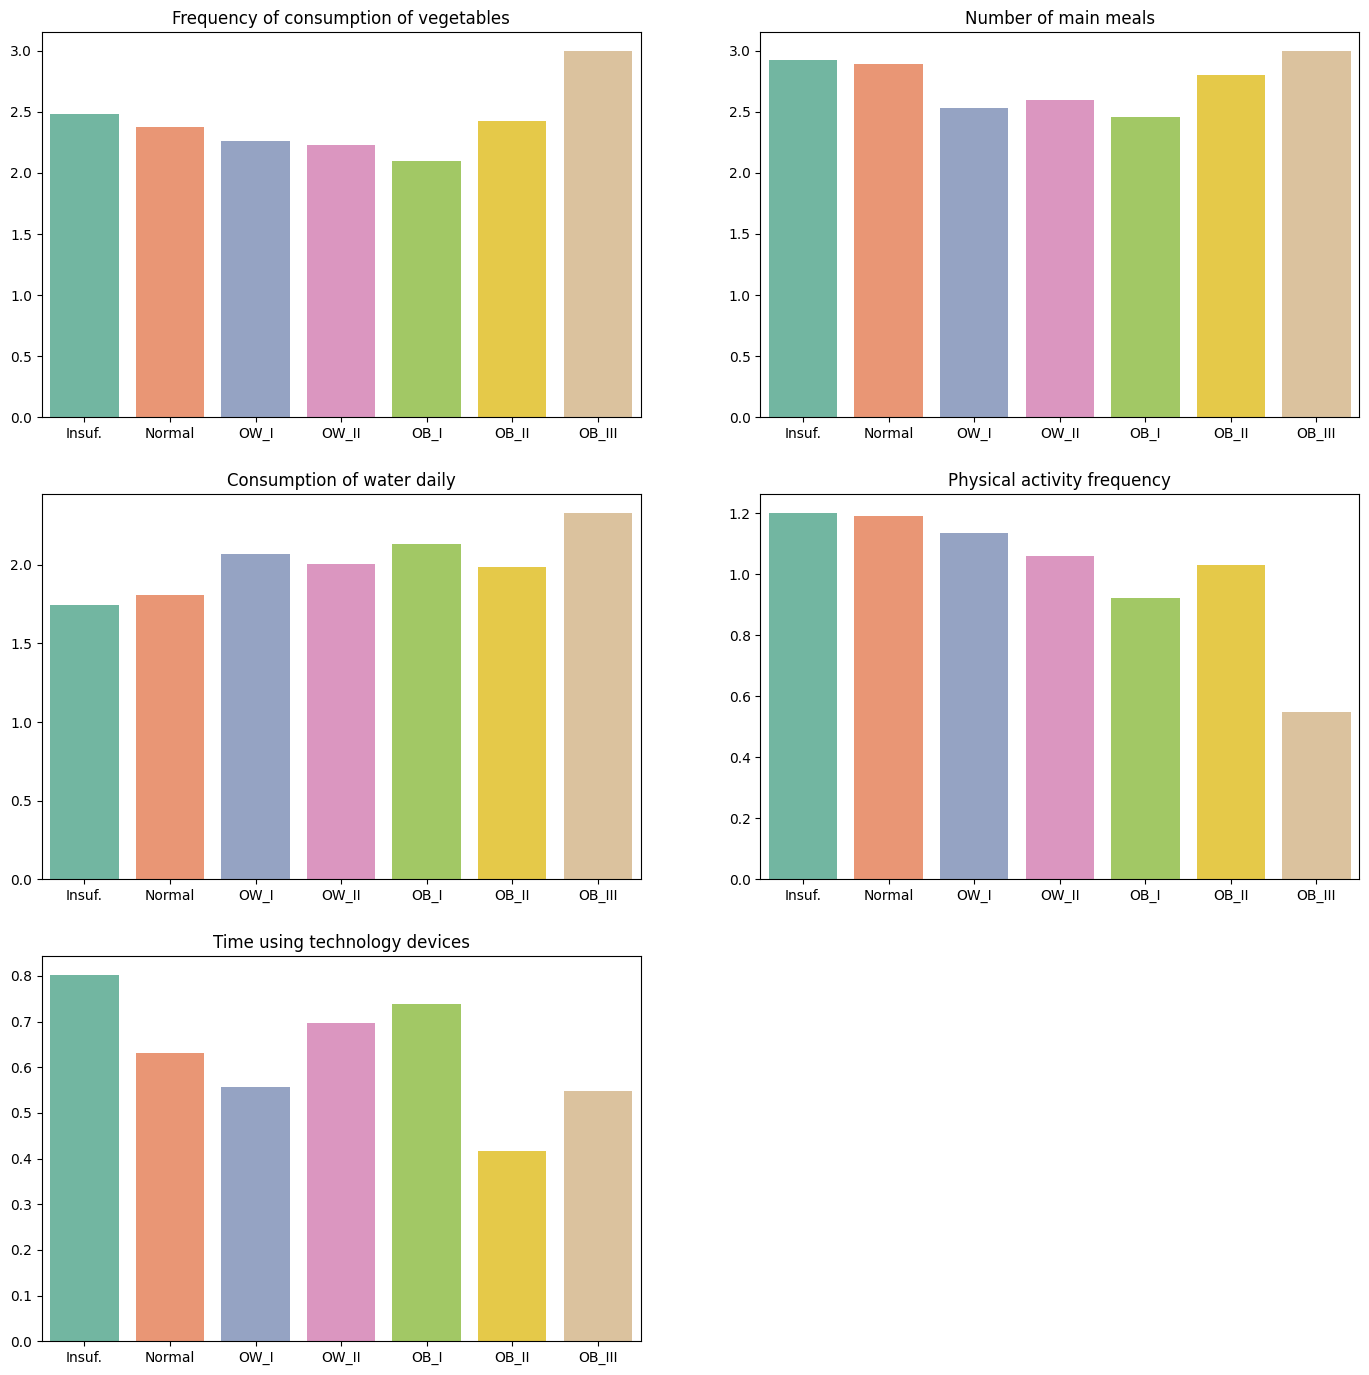

In [13]:
# Create a 3x2 grid of bar charts to show the mean of specific features across obesity categories
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17, 17))
ax = ax.flatten()  # Flatten axes array for easy indexing

# Plot each feature in 'columns' as a bar chart with mean values grouped by obesity category
for index, column in enumerate(columns):
    data = df_train[[column, "NObeyesdadReduced"]]  
    data = data.groupby(["NObeyesdadReduced"])[column].mean()  
    
    sns.barplot(x=data.index.values, y=data.values, ax=ax[index], palette="Set2")  
    ax[index].set_title(titles[index])  

fig.delaxes(ax[5])  # Remove any unused subplot space
plt.show()  

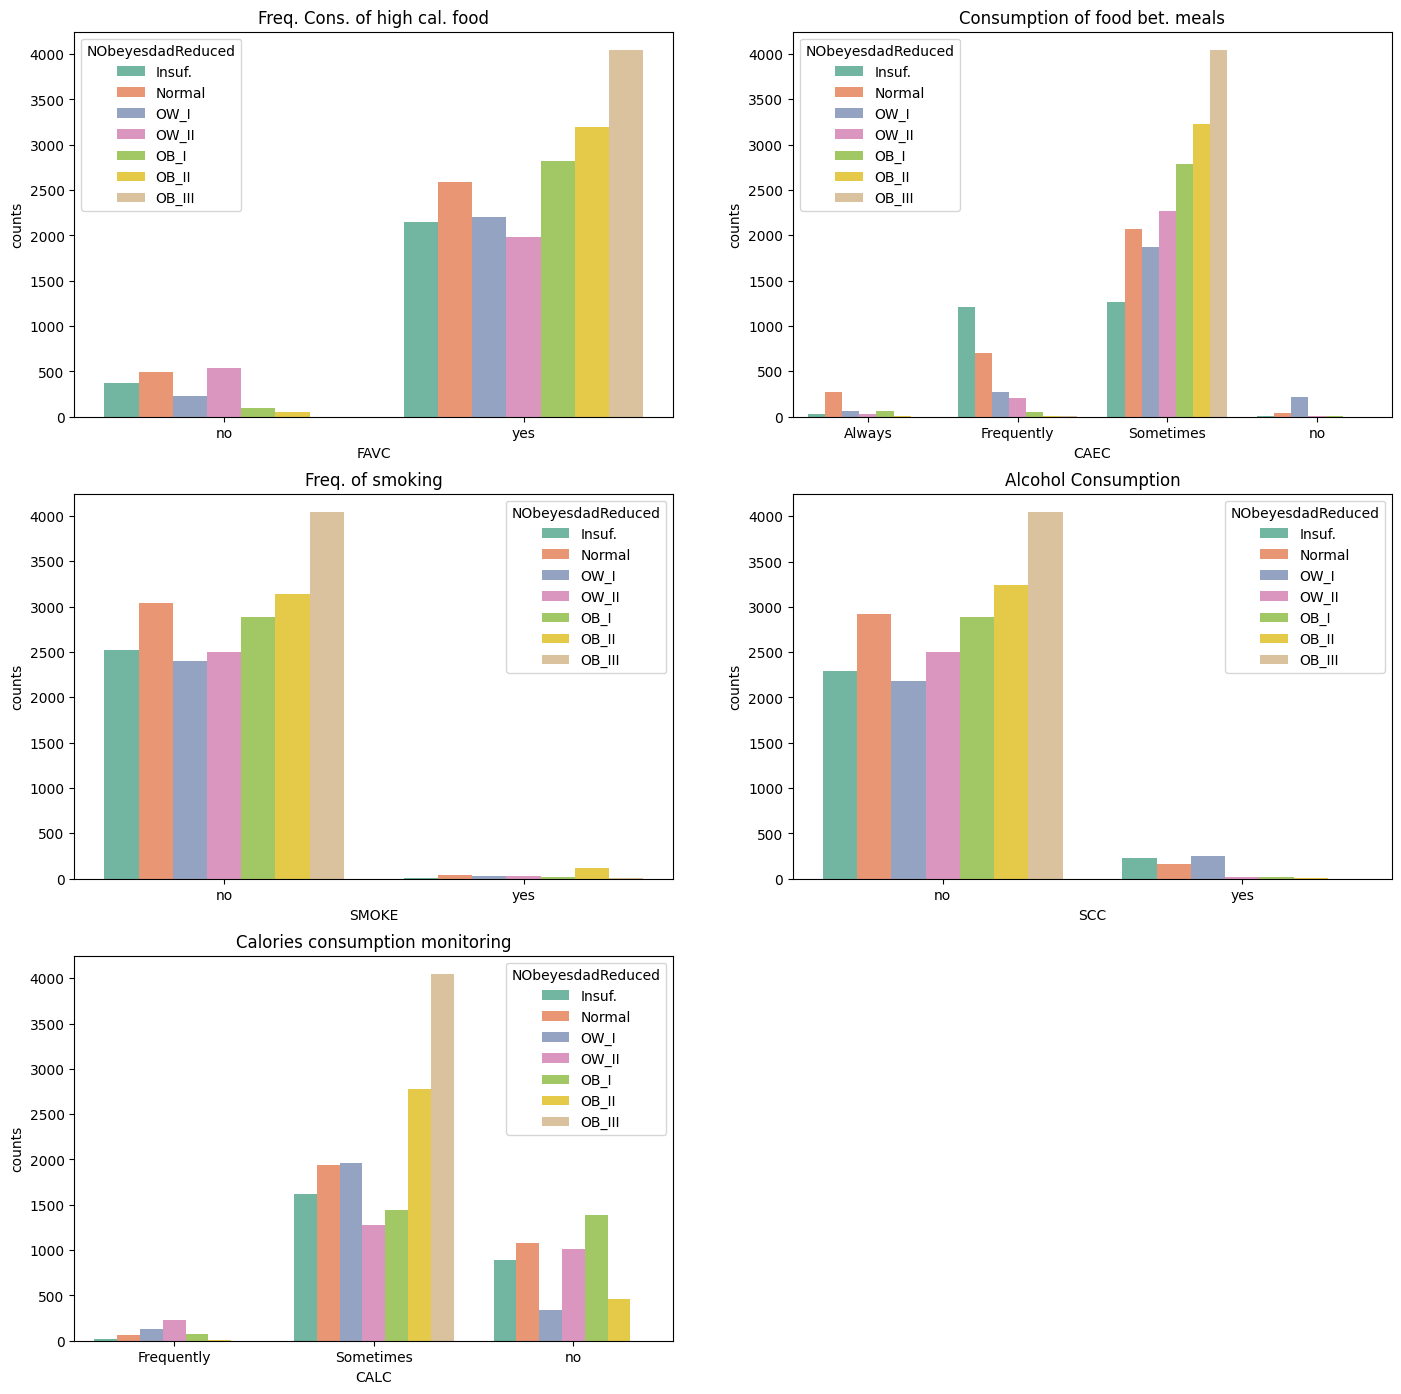

In [14]:
# Define columns and titles for features related to eating habits, smoking, and alcohol consumption
columns = ["FAVC", "CAEC", "SMOKE", "SCC", "CALC"]
titles = ["Freq. Cons. of high cal. food", "Consumption of food bet. meals", 
          "Freq. of smoking", "Alcohol Consumption", "Calories consumption monitoring"]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17, 17))   
ax = ax.flatten()  # Flatten the axes array for easy indexing

# Plot each feature as a grouped bar chart showing counts by obesity category
for index, column in enumerate(columns):
    data = df_train[[column, "NObeyesdadReduced"]]  
    data = data.groupby(["NObeyesdadReduced", column]).size().reset_index(name='counts')  # Count occurrences per category
    
    sns.barplot(x=column, y='counts', hue='NObeyesdadReduced', data=data, ax=ax[index], palette="Set2") 
    ax[index].set_title(titles[index])  

fig.delaxes(ax[5])  # Remove unused subplot space
plt.show()  

#### 2.5 Confusion Matrix

In [ ]:
df_train = pd.read_csv("train.csv")

In [16]:
# Identify categorical columns in the dataset
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Set up a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encode, dropping the first category to avoid multicollinearity
    ],
)

# Apply the transformation and convert the result to a DataFrame
df_preprocessed = preprocessor.fit_transform(df_train)
df_preprocessed = pd.DataFrame(df_preprocessed.toarray(), columns=preprocessor.get_feature_names_out())

# Drop the original categorical columns and merge the preprocessed data back into the main DataFrame
df_train = df_train.drop(columns=categorical_columns)
df_train = pd.concat([df_train.reset_index(drop=True), df_preprocessed.reset_index(drop=True)], axis=1)

In [17]:
# Rename columns in df_train to more descriptive or simplified names after encoding
df_train.rename(columns={'cat__Gender_Male': 'IsMale', 'cat__family_history_with_overweight_yes': 'HasFamilyWithOb',
                         'cat__FAVC_yes':'CHighCalFood', 'cat__CAEC_Frequently':'CAEC_Frequently', 'cat__CAEC_Sometimes':'CAEC_Sometimes',
                         'cat__CAEC_no':'CAEC_no', 'cat__SMOKE_yes':'SMOKE_yes', 'cat__SCC_yes':'SCC_yes',
                         'cat__CALC_Sometimes':'CALC_Sometimes', 'cat__CALC_no':'CALC_no', 'cat__MTRANS_Bike':'MTRANS_Bike',
                         'cat__MTRANS_Motorbike':'MTRANS_Motorbike', 'cat__MTRANS_Public_Transportation':'MTRANS_PubTransp',
                         'cat__MTRANS_Walking':'MTRANS_Walking', 'cat__NObeyesdad_Normal_Weight':'Y_Normal_Weight',
                         'cat__NObeyesdad_Obesity_Type_I':'Y_Ob_I',
                         'cat__NObeyesdad_Obesity_Type_II':'Y_Ob_II',
                         'cat__NObeyesdad_Obesity_Type_III':'Y_Ob_III',
                         'cat__NObeyesdad_Overweight_Level_I':'Y_OW_I',
                         'cat__NObeyesdad_Overweight_Level_II':'Y_OW_II'
                         }, inplace=True)

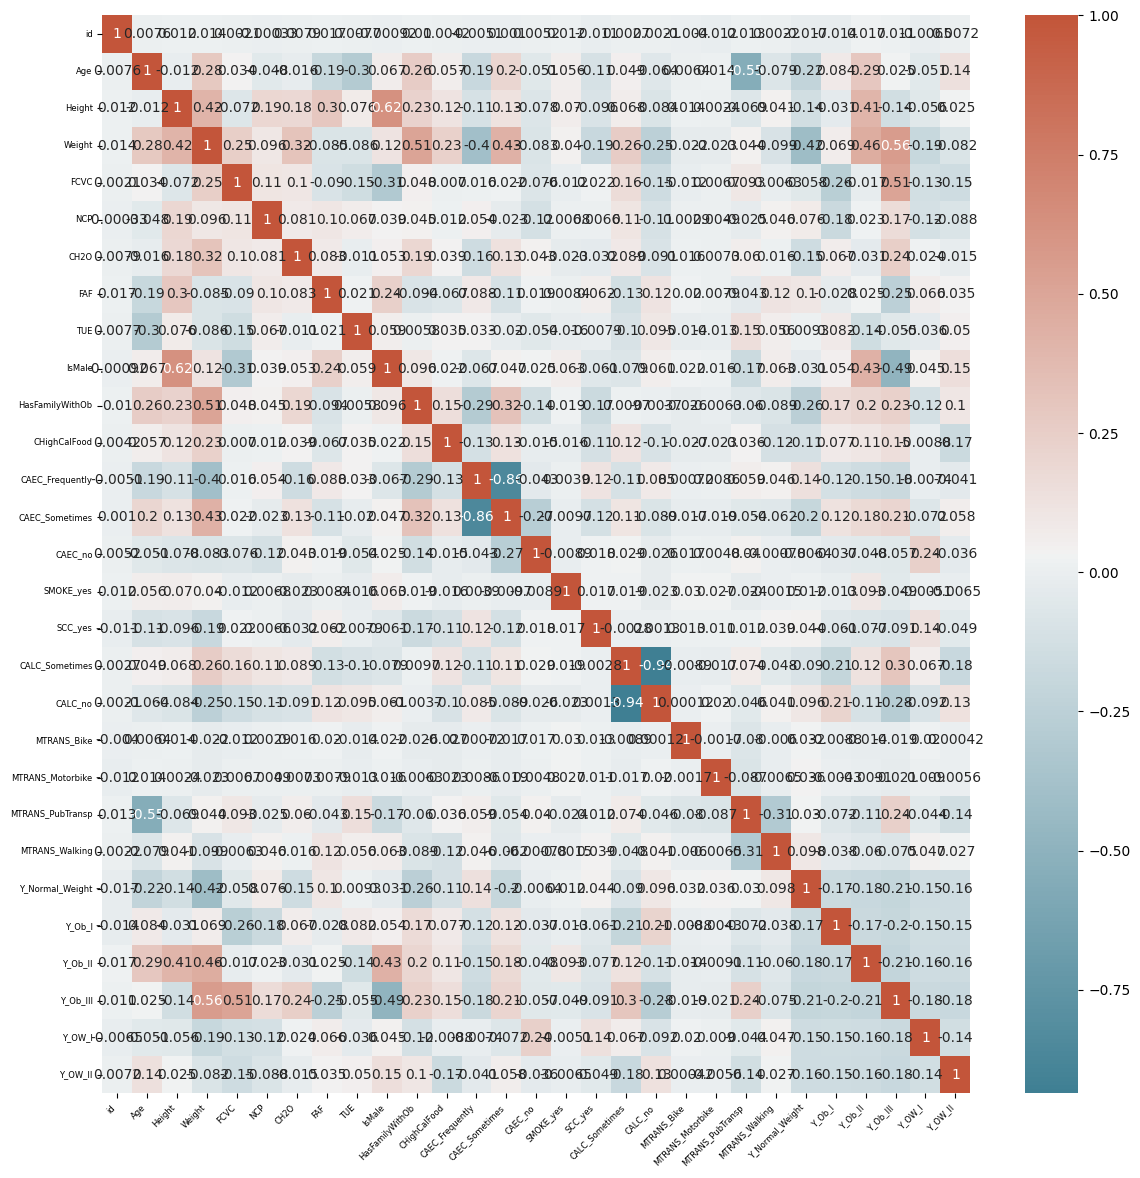

In [18]:
# Calculate Pearson correlation matrix for the training data
corr = df_train.corr(method='pearson')

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(14, 14))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Adjust font sizes and rotation for readability
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=6)
plt.show()

* Features like Weight and BMI show strong positive correlations with obesity-related labels, suggesting these are significant factors for obesity.
* There are a few features with negative correlations, though these are less pronounced. For example, MTRANS_Walking shows some negative correlation with obesity labels, possibly indicating that those who walk more for transportation are less likely to be obese.
* Features like HasFamilyWithOb, CHighCalFood, CAEC_Frequently, and CAEC_Sometimes show some moderate correlations with obesity labels, hinting that they might be predictive features in obesity analysis.

#### 2.6 Mean weight in different age ranges

Text(0.5, 1.0, 'Mean Weight in different age ranges')

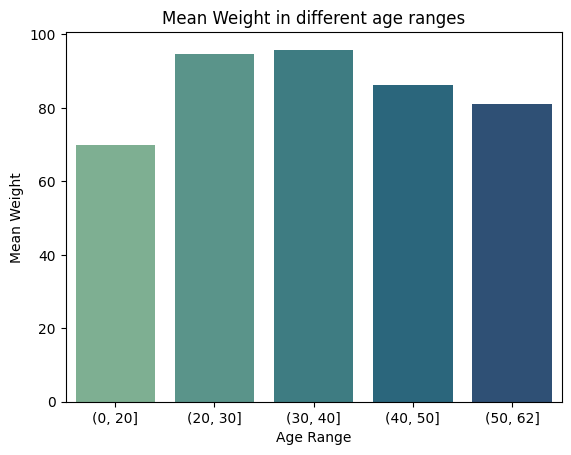

In [19]:
df_groupbyage = df_train.groupby(pd.cut(df_train['Age'], [0,20,30,40,50,62]), observed=True).mean()
sns.barplot(x=df_groupbyage.index,y=df_groupbyage['Weight'], data = df_groupbyage, palette='crest')
plt.xlabel("Age Range")
plt.ylabel("Mean Weight")
plt.title("Mean Weight in different age ranges")

## 3. Data Manipulation

### 3.1 Data Distribution:

In [ ]:
df_train = pd.read_csv("train.csv")

#### Duplicated data:

In [21]:
df_train[df_train.duplicated(keep=False)]

Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

#### Data distribution and outliers detection

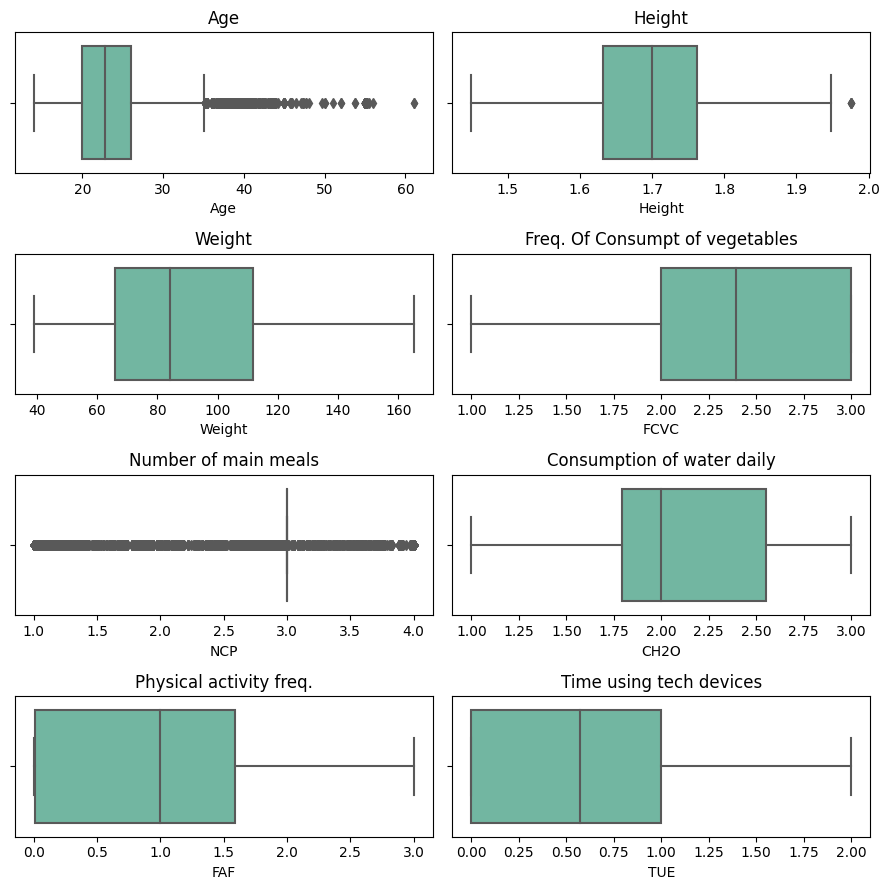

In [22]:
numerical_columns = ["Age", "Height","Weight","FCVC","NCP","CH2O","FAF", "TUE"]
titles = ["Age", "Height", "Weight","Freq. Of Consumpt of vegetables", "Number of main meals", "Consumption of water daily", "Physical activity freq.", "Time using tech devices"]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(9,9))
ax = ax.flatten()
for index, column in enumerate(numerical_columns):
    data = df_train[column]
    sns.boxplot(x=data, ax=ax[index], palette="Set2")
    ax[index].set_title(titles[index])

plt.tight_layout()
plt.show()
    

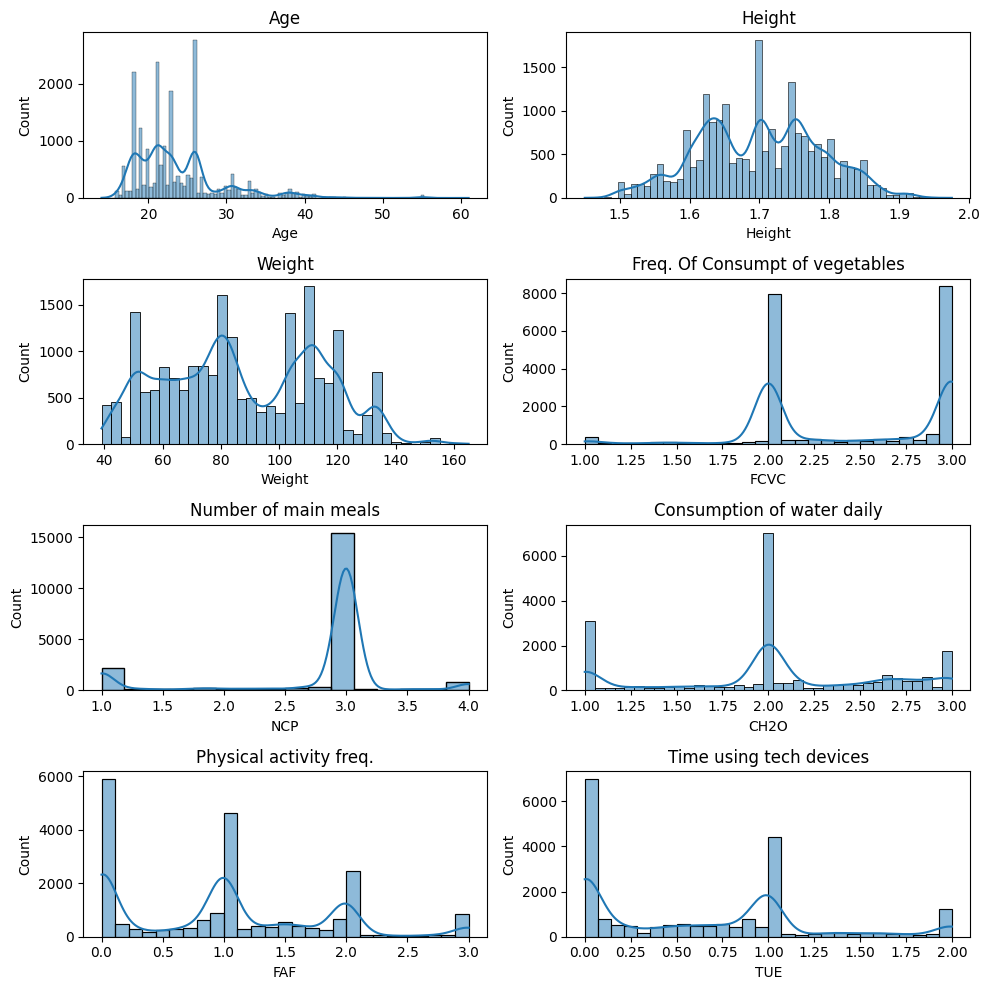

In [23]:
numerical_columns = ["Age", "Height","Weight","FCVC","NCP","CH2O","FAF", "TUE"]
titles = ["Age", "Height", "Weight","Freq. Of Consumpt of vegetables", "Number of main meals", "Consumption of water daily", "Physical activity freq.", "Time using tech devices"]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
ax = ax.flatten()
for index, column in enumerate(numerical_columns):
    data = df_train[column]
    sns.histplot(x=data, ax=ax[index], kde = True)
    ax[index].set_title(titles[index])

plt.tight_layout()
plt.show()

Many features have sparse data, like physical activity and time using tech devices. These features can be rounded or transform it into ranges.
Possibles transformations:
1. Round FCVC (pd.cut) Freq. Of Consumption of vegetables to 1-1.5(1) 1.5-2.5(2) 2.5-3(high)
2. Round NCP Number of main meals to 1,2,3 & 4
3. Round CH20 Consumption of water daily
4. Bin FAF Freq. Of Physical Act. (0-0.5 → 0: No physical act.) (0.5-1.5 → 1: Low freq.) (1.5-2.5 → 2: Moderate freq.) (2.5-3.0 → 3: High freq)
5. Bin TUE (pd.cut) Time using tech technology to 0-0.5(low) 0.5-1.5(moderate) 1.5-2(high)
6. PowerTransform Age
7. Std. Height and Weight
8. Min Max all features (applied only to NN and those who requires)

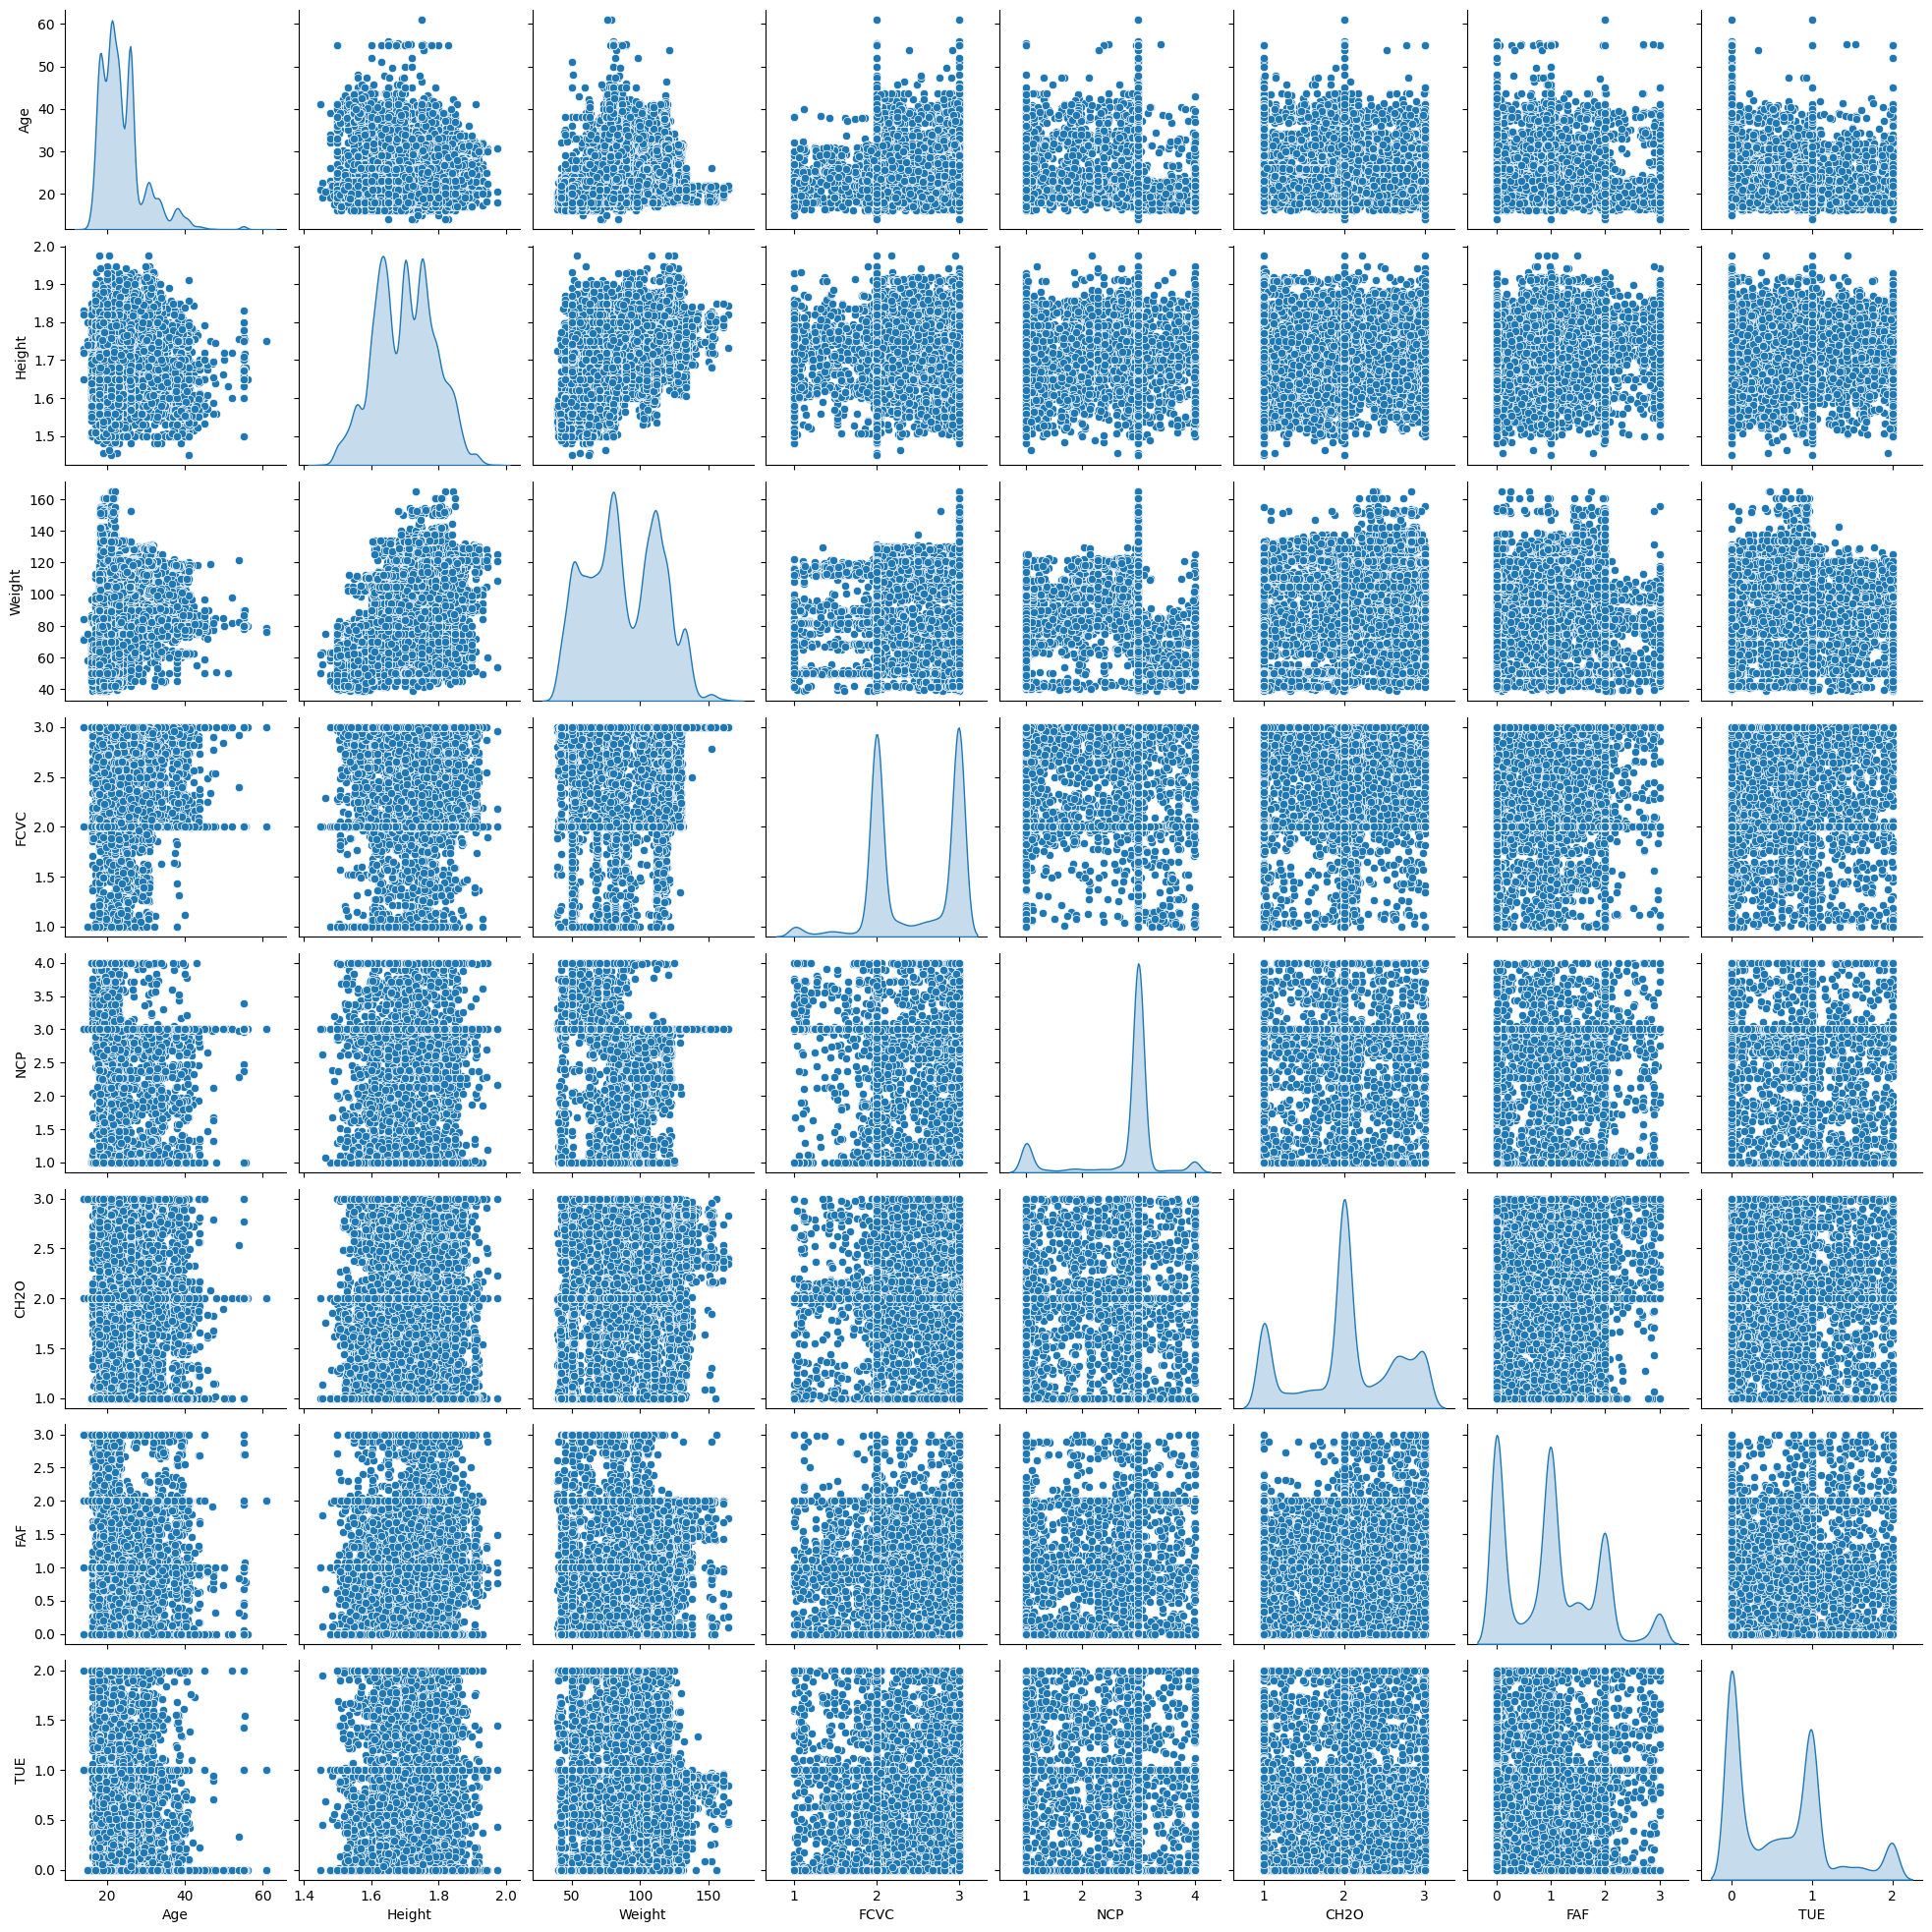

In [24]:
sns.pairplot(df_train[numerical_columns], diag_kind="kde")

### 3.2 Interval and round transformations

In [25]:
faf_labels = [0,1,2,3]
faf_intervals = [0,0.5,1.5,2.5,3.1]
tue_labels = [0,1,2]
tue_intervals = [0,0.5,1.5,2.1]

df_train["FCVC"] = df_train["FCVC"].apply(lambda x: round(x))
df_train["NCP"] = df_train["NCP"].apply(lambda x: round(x))
df_train["CH2O"] = df_train["CH2O"].apply(lambda x: round(x))

df_train["FAF"] = pd.cut(df_train["FAF"], bins=faf_intervals, labels=faf_labels, right=False).astype("float64")
df_train["TUE"] = pd.cut(df_train["TUE"], bins=tue_intervals, labels=tue_labels, right=False).astype("float64")

##### Delete outliers if necessary:

In [ ]:
# Q1 = df_train[numerical_columns].quantile(0.25)
# Q3 = df_train[numerical_columns].quantile(0.75)
# IQR = Q3 - Q1

# inf_limit = Q1 - 1.5 * IQR
# sup_limit = Q3 + 1.5 * IQR

# # delete outliers
# df_train[~((df_train[numerical_columns] < inf_limit) | (df_train[numerical_columns] > sup_limit)).any(axis=1)]

##### Verify if data types are correct:

In [26]:
df_train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

## 4. Feature Engineering


In [7]:
# Load the training and test datasets
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

# Define labels and intervals for binning the 'FAF' and 'TUE' columns
faf_labels = [0, 1, 2, 3]
faf_intervals = [0, 0.5, 1.5, 2.5, 3.1]
tue_labels = [0, 1, 2]
tue_intervals = [0, 0.5, 1.5, 2.1]

# Round values in certain columns of the training set to integers for categorical representation
df_train["FCVC"] = df_train["FCVC"].apply(lambda x: round(x))
df_train["NCP"] = df_train["NCP"].apply(lambda x: round(x))
df_train["CH2O"] = df_train["CH2O"].apply(lambda x: round(x))

# Bin the 'FAF' and 'TUE' columns in the training set using specified intervals and labels
df_train["FAF"] = pd.cut(df_train["FAF"], bins=faf_intervals, labels=faf_labels, right=False).astype("float64")
df_train["TUE"] = pd.cut(df_train["TUE"], bins=tue_intervals, labels=tue_labels, right=False).astype("float64")

# Repeat the same transformations for the test set
df_test["FCVC"] = df_test["FCVC"].apply(lambda x: round(x))
df_test["NCP"]  = df_test["NCP"].apply(lambda x: round(x))
df_test["CH2O"] = df_test["CH2O"].apply(lambda x: round(x))

df_test["FAF"] = pd.cut(df_test["FAF"], bins=faf_intervals, labels=faf_labels, right=False).astype("float64")
df_test["TUE"] = pd.cut(df_test["TUE"], bins=tue_intervals, labels=tue_labels, right=False).astype("float64")


In [8]:
# Separate the target variable from the features in the training data
ytrn = df_train["NObeyesdad"]  # Target variable (obesity category)
xtrn = df_train.drop(["NObeyesdad"], axis=1)  # Training features excluding the target column

# Test data remains as is (all features included)
xtst = df_test

##### Reduce obesity names and transform to categorical 

In [9]:
categories_reduced = {"Normal_Weight":"Normal","Insufficient_Weight":"Insuf.","Overweight_Level_I":"OW_I","Overweight_Level_II":"OW_II",
                     "Obesity_Type_I":"OB_I","Obesity_Type_II":"OB_II","Obesity_Type_III":"OB_III"}

obesity_order = ["Insuf.","Normal","OW_I","OW_II",
                     "OB_I","OB_II","OB_III"]
ytrn = ytrn.apply(lambda x: categories_reduced[x])
ytrn = pd.Categorical(ytrn, categories=obesity_order, ordered=True)

### 4.1 Data codification

In [10]:
# Define columns for different preprocessing steps
pwtr_numerical_columns = ["Age"]  # Power Transformation
std_numerical_columns = ["Height", "Weight"]  # Standard Scaling
ordinal_columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]  # Min-Max Scaling
categorical_columns = xtrn.select_dtypes(include=['object', 'category']).columns.tolist()  # One-Hot Encoding

# Transformers for each column type
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
pwtr_numerical_transformer = Pipeline(steps=[('power', PowerTransformer())])
std_numerical_transformer = Pipeline(steps=[('std', StandardScaler())])
ordinal_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

# Preprocessor combines all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('pwr_num', pwtr_numerical_transformer, pwtr_numerical_columns),
        ('std_num', std_numerical_transformer, std_numerical_columns),
        ('ord', ordinal_transformer, ordinal_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Apply transformations
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
xtrn = pipeline.fit_transform(xtrn)
xtst = pipeline.transform(xtst)

# Encode target labels
label_encoder = LabelEncoder()
ytrn = label_encoder.fit_transform(ytrn)

c:\Users\aleja\anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:182: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### 4.2 Check Data Transformation

In [33]:
transformed_column_names = (
    pwtr_numerical_columns + 
    std_numerical_columns + 
    ordinal_columns +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
)

transformed_df = pd.DataFrame(xtrn, columns=transformed_column_names)
transformed_df

Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE  \
0      0.392273 -0.002828 -0.235713   0.5  0.666667   1.0  0.000000  0.5   
1     -1.379784 -1.606291 -1.170931   0.5  0.666667   0.5  0.333333  0.5   
2     -1.379784  0.128451 -1.430012   0.5  0.000000   0.5  0.333333  1.0   
3     -0.403279  0.120090  1.644770   1.0  0.666667   0.5  0.333333  0.5   
4      1.384082  2.450367  0.224054   1.0  0.333333   0.5  0.666667  0.5   
...         ...       ...       ...   ...       ...   ...       ...  ...   
20753  0.518774  0.760293  0.996987   1.0  0.666667   0.5  0.333333  0.0   
20754 -1.379784  0.111729 -1.436296   1.0  1.000000   0.0  0.666667  0.5   
20755 -0.649421  1.366537  0.670717   0.5  0.666667   0.5  0.333333  0.5   
20756  1.587449 -0.002805 -0.165574   1.0  0.333333   0.5  0.000000  0.5   
20757  0.771434  1.332062  1.146645   1.0  0.666667   0.5  0.333333  0.5   

       Gender_Male  family_history_with_overweight_yes  ...  CAEC_Sometimes  \
0              1.0                                 1.0  ...             1.0   
1              0.0                                 1.0  ...             0.0   
2              0.0                                 1.0  ...             1.0   
3              0.0                                 1.0  ...             1.0   
4              1.0                                 1.0  ...             1.0   
...            ...                                 ...  ...             ...   
20753          1.0                                 1.0  ...             1.0   
20754          1.0                                 0.0  ...             0.0   
20755          1.0                                 1.0  ...             1.0   
20756          1.0                                 1.0  ...             1.0   
20757          1.0                                 1.0  ...             1.0   

       CAEC_no  SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0          0.0        0.0      0.0             1.0      0.0          0.0   
1          0.0        0.0      0.0             0.0      1.0          0.0   
2          0.0        0.0      0.0             0.0      1.0          0.0   
3          0.0        0.0      0.0             1.0      0.0          0.0   
4          0.0        0.0      0.0             1.0      0.0          0.0   
...        ...        ...      ...             ...      ...          ...   
20753      0.0        0.0      0.0             1.0      0.0          0.0   
20754      0.0        0.0      0.0             1.0      0.0          0.0   
20755      0.0        0.0      0.0             0.0      1.0          0.0   
20756      0.0        0.0      0.0             0.0      1.0          0.0   
20757      0.0        0.0      0.0             1.0      0.0          0.0   

       MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                   0.0                           1.0             0.0  
1                   0.0                           0.0             0.0  
2                   0.0                           1.0             0.0  
3                   0.0                           1.0             0.0  
4                   0.0                           1.0             0.0  
...                 ...                           ...             ...  
20753               0.0                           1.0             0.0  
20754               0.0                           1.0             0.0  
20755               0.0                           1.0             0.0  
20756               0.0                           0.0             0.0  
20757               0.0                           1.0             0.0  

[20758 rows x 22 columns]

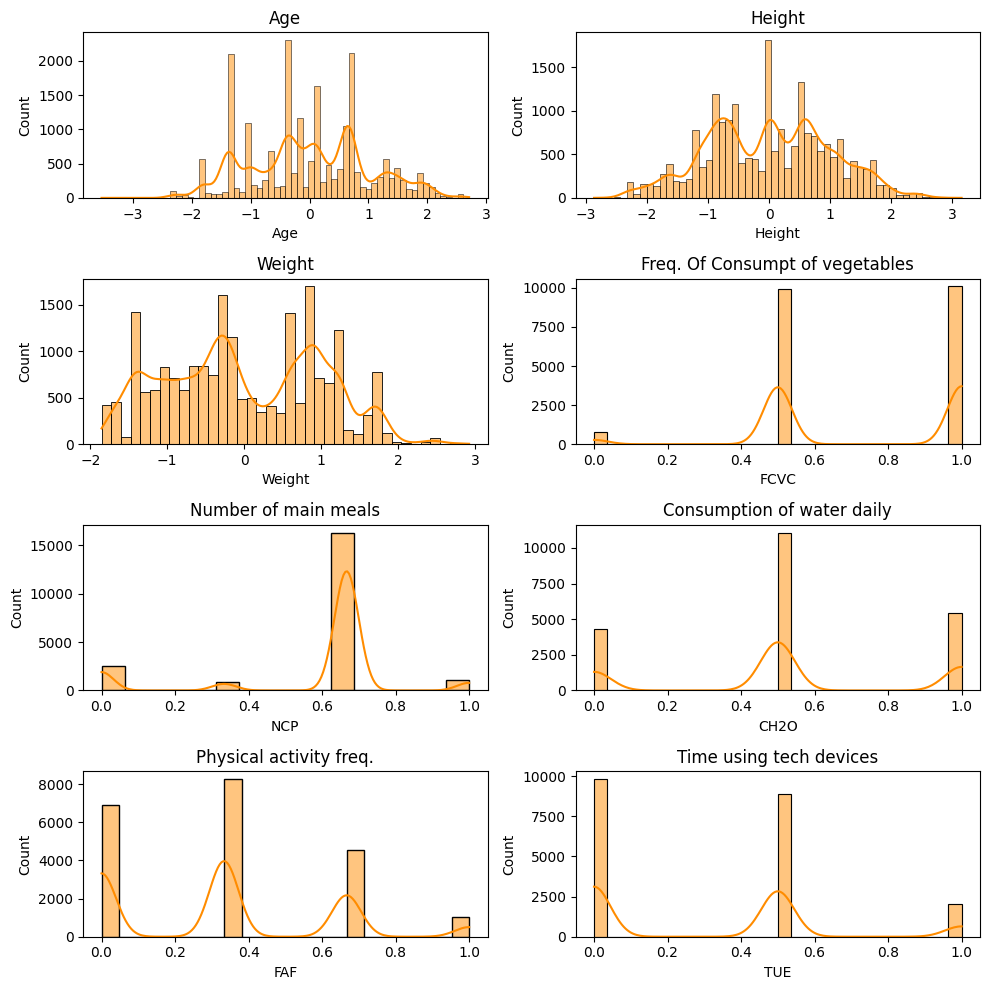

In [34]:
numerical_columns = ["Age", "Height","Weight","FCVC","NCP","CH2O","FAF", "TUE"]
titles = ["Age", "Height", "Weight","Freq. Of Consumpt of vegetables", "Number of main meals", "Consumption of water daily", "Physical activity freq.", "Time using tech devices"]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
ax = ax.flatten()
for index, column in enumerate(numerical_columns):
    data = transformed_df[column]
    sns.histplot(x=data, ax=ax[index], kde = True, color="darkorange")
    ax[index].set_title(titles[index])

plt.tight_layout()
plt.show()

### 4.3 Importance permutation

In [35]:
# Cargar datos y dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(xtrn, ytrn, test_size=0.3, random_state=42)

# Entrenar un modelo, en este caso un RandomForest
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Calcular la importancia por permutación
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Mostrar las importancias
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"{transformed_df.columns[i]}: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Weight: 0.5746 ± 0.0047
Gender_Male: 0.1621 ± 0.0033
FCVC: 0.1038 ± 0.0033
Height: 0.0794 ± 0.0022
Age: 0.0472 ± 0.0019
family_history_with_overweight_yes: 0.0145 ± 0.0013
FAVC_yes: 0.0059 ± 0.0009
CAEC_Frequently: 0.0059 ± 0.0008
CALC_no: 0.0044 ± 0.0008
CH2O: 0.0026 ± 0.0009
NCP: 0.0020 ± 0.0007
SCC_yes: 0.0014 ± 0.0003
MTRANS_Public_Transportation: 0.0009 ± 0.0008
CAEC_Sometimes: 0.0004 ± 0.0010
CAEC_no: 0.0003 ± 0.0002
TUE: 0.0001 ± 0.0017
SMOKE_yes: 0.0000 ± 0.0001
MTRANS_Bike: 0.0000 ± 0.0000
MTRANS_Motorbike: 0.0000 ± 0.0000
FAF: -0.0006 ± 0.0010
MTRANS_Walking: -0.0009 ± 0.0002
CALC_Sometimes: -0.0012 ± 0.0011


## 5. Model Selection

In [11]:
xtrn_split, xval_split, ytrn_split, yval_split = train_test_split(xtrn, ytrn, test_size=0.2, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((xtrn_split,ytrn_split))
validation_dataset = tf.data.Dataset.from_tensor_slices((xval_split,yval_split))

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(buffer_size=1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

#### 5.1 Custom MLP

In [14]:
nclasses = len(df_train["NObeyesdad"].unique())
input_dim = xtrn.shape[1]

In [38]:
def build_model(hp):

    model = tf.keras.Sequential()

    # Define the units for the first, second, third dense layers and activation function with tunable ranges
    units1 = hp.Int('units1', min_value=32, max_value=128, step=32)
    units2 = hp.Int('units2', min_value=24, max_value=64, step=16)
    units3 = hp.Int('units3', min_value=16, max_value=32, step=8)
    activation = hp.Choice('activation', values=['relu', 'tanh'])

    # Add layers with defined units and activation function
    model.add(layers.Dense(units=units1, activation=activation, input_shape=(input_dim,)))
    model.add(layers.Dense(units=units2, activation=activation))
    model.add(layers.Dense(units=units3, activation=activation))
    model.add(layers.Dense(units=nclasses, activation='softmax'))

    # Choose learning rate and optimizer type
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# Configuración de Keras Tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=35,
    factor=4, # mantendrá solo el 1/4 de las configuraciones más prometedoras y descartará las restantes.
    executions_per_trial=3,
    project_name='MLPModel_tuning'
)

In [ ]:
tuner.search(
    train_dataset,
    epochs=35,
    validation_data=validation_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)]
)

In [ ]:
# Obtener los mejores hiperparámetros y el mejor modelo
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores hiperparámetros: {best_hps.values}")

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

In [ ]:
class MLPModel(Model):
    def __init__(self, input_dim, nclasses):
        super(MLPModel, self).__init__()
        self.dense1 = layers.Dense(units=128, activation='tanh')
        self.dense2 = layers.Dense(units=56, activation='tanh')
        self.dense3 = layers.Dense(units=24, activation='tanh')
        self.dense4 = layers.Dense(units=nclasses, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

# Create the model by specifying the input dimensions and number of classes
model = MLPModel(input_dim=input_dim, nclasses=nclasses)

# Create a dummy input tensor with random values to build the model
dummy_input = tf.random.normal(shape=(1, input_dim))
model(dummy_input)  

# Compile the model with an optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(
    xtrn,
    ytrn,
    validation_split = 0.2,
    epochs = 35,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)]
)

In [ ]:
y_pred = model.evaluate(validation_dataset)
print(f"Accuracy: {y_pred[1]}")

#### 5.2 LightGBM

##### Let's see the accuracy obtained with default lightgbm

In [ ]:
lgb_model = lgb.LGBMClassifier(verbose=-1)
lgb_model.fit(xtrn_split, ytrn_split)

y_pred = lgb_model.predict(xval_split)
print(f"Accuracy score: ", accuracy_score(yval_split, y_pred))

In [ ]:
def objective_lgbm(trial):         
    param = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000),
        'learning_rate': trial.suggest_float("learning_rate",1e-2,0.2),        
        'max_depth': trial.suggest_int("max_depth", 1, 10),                     
        'min_child_weight': trial.suggest_float("min_child_weight", 1e-2, 0.2),                       
        'subsample': trial.suggest_float("subsample",0,1),                   
        'colsample_bytree': trial.suggest_float("colsample_bytree",0,1),            
        'reg_alpha': trial.suggest_float("reg_alpha",0,1),                  
        'reg_lambda':  trial.suggest_float("reg_lambda",0,1),   
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),    
    }
    
    lgb_model = lgb.LGBMClassifier(verbose=-1)
    lgb_model.set_params(**param)
    lgb_model.fit(xtrn_split, ytrn_split)
    y_pred = lgb_model.predict(xval_split)
    return accuracy_score(yval_split, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='maximize')
study.optimize(objective_lgbm, n_trials=100)
print(f'Study best value obtained: {study.best_value} with params: {study.best_params}')

In [ ]:
lgb_model = lgb.LGBMClassifier(num_leaves=30, n_estimators=320, min_child_weight=0.1, min_child_samples=13, max_depth=4, learning_rate=0.05, verbose=-1)
lgb_model.fit(xtrn_split, ytrn_split)

y_pred = lgb_model.predict(xval_split)
print(f"Accuracy score: ", accuracy_score(yval_split, y_pred))

#### 5.3 XGBoost

##### Let's see the accuracy obtained with default xgboost

In [15]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(xtrn_split, ytrn_split)

y_pred = xgb_model.predict(xval_split)
print(f"Accuracy score: ", accuracy_score(yval_split, y_pred))

Accuracy score:  0.9000481695568401


In [ ]:
def objective(trial):    
    
    param = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 500),
        'learning_rate': trial.suggest_float("learning_rate",1e-2,0.2),        
        'max_depth': trial.suggest_int("max_depth", 1, 10),                     
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10),               
        'gamma': trial.suggest_float("gamma",0,0.6),               
        'subsample': trial.suggest_float("subsample",0,1),                   
        'colsample_bytree': trial.suggest_float("colsample_bytree",0,1),            
        'reg_alpha': trial.suggest_float("reg_alpha",0,1),                  
        'reg_lambda':  trial.suggest_float("reg_lambda",0,2),                          
    }
    
    xgb_model = xgb.XGBClassifier()
    xgb_model.set_params(**param)
    xgb_model.fit(xtrn_split, ytrn_split)
    y_pred = xgb_model.predict(xval_split)
    return accuracy_score(yval_split, y_pred)   


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(f'Study best value obtained: {study.best_value} with params: {study.best_params}')

In [19]:
xgb_model = xgb.XGBClassifier(n_estimators=385, learning_rate=0.0806915052693689, max_depth=5, 
                              min_child_weight=4, gamma=0.33416277277261659544, subsample=0.8713476110429962, 
                              colsample_bytree=0.688342468314642, reg_alpha=0.6972525009424858, 
                              reg_lambda=1.92022520208021)
xgb_model.fit(xtrn_split, ytrn_split)

y_pred = xgb_model.predict(xval_split)
y_proba = xgb_model.predict_proba(xval_split)
print(f"Accuracy score: ", accuracy_score(yval_split, y_pred))
yval_bin = label_binarize(yval_split, classes = np.arange(0, nclasses))

Accuracy score:  0.9111271676300579


> Trial 64 finished with value: 0.9108863198458574 and parameters: {'n_estimators': 385, 'learning_rate': 0.08069615052693689, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.33416277261659544, 'subsample': 0.8713476110429962, 'colsample_bytree': 0.688342468314642, 'reg_alpha': 0.6972525009424858, 'reg_lambda': 1.92022520208021, 'scale_pos_weight': 4}. Best is trial 64 with value: 0.9108863198458574.

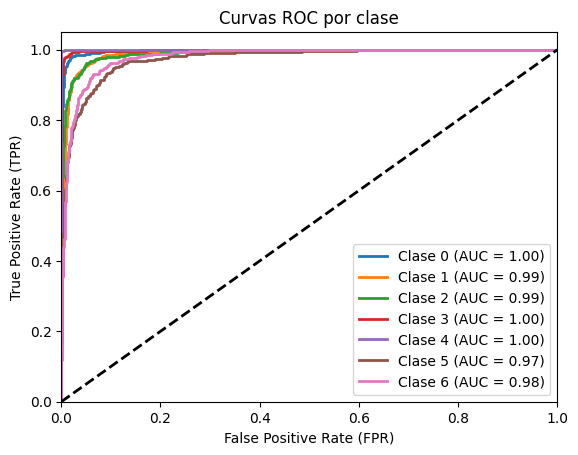

In [23]:
# Crear curvas ROC para cada clase
for i in range(nclasses):  # Número de clases
    fpr, tpr, thresholds = roc_curve(yval_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

# Configuración de la gráfica
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea de azar
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curvas ROC por clase')
plt.legend(loc="lower right")
plt.show()

#### 5.3.1 Probability Thresholding

In [21]:
def objective_threshold(trial):  
    # Suggest thresholds for each class
    thresholds = [trial.suggest_float(f'threshold{i}', 0.0, 1.0) for i in range(nclasses)]
    y_pred_new = y_pred.copy()  # Copy of predictions to modify
    
    # Evaluate predicted class based on threshold
    for i in range(y_proba.shape[0]):
        selected_class = None
        max_prob = 0
        for j, prob in enumerate(y_proba[i, :]):
            if prob >= thresholds[j] and prob > max_prob:
                max_prob = prob
                selected_class = j
        
        if selected_class is not None:
            y_pred_new[i] = selected_class
    
    return accuracy_score(yval_split, y_pred_new)

# Set Optuna logging verbosity
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective_threshold, n_trials=4000)

# Print best thresholds and accuracy
print(f'Study best thresholds obtained: {study.best_value} with params: {study.best_params}')

Study best thresholds obtained: 0.9125722543352601 with params: {'threshold0': 0.48942843150691323, 'threshold1': 0.4645374109322842, 'threshold2': 0.9604971734652323, 'threshold3': 0.5660801030265857, 'threshold4': 0.4634044660709618, 'threshold5': 0.820491521004278, 'threshold6': 0.47206649688831875}


> Study best thresholds obtained: 0.9125722543352601 with params: {'threshold0': 0.48942843150691323, 'threshold1': 0.4645374109322842, 'threshold2': 0.9604971734652323, 'threshold3': 0.5660801030265857, 'threshold4': 0.4634044660709618, 'threshold5': 0.820491521004278, 'threshold6': 0.47206649688831875}

In [ ]:
def apply_threshold(y_proba, thresholds):
    y_pred = np.argmax(y_proba, axis=1)

    # Iterate through each sample to apply the thresholds
    for i in range(y_proba.shape[0]):
        selected_class = None
        max_prob = 0
        for j, prob in enumerate(y_proba[i,:]):
            if prob >= thresholds[j] and prob > max_prob:
                max_prob = prob
                selected_class = j
        
        if selected_class is not None:
            y_pred[i] = selected_class
    
    return y_pred


# thresholds = [0.48942843150691323, 0.4645374109322842, 0.9604971734652323,
#               0.5660801030265857, 0.4634044660709618, 0.820491521004278,
#               0.47206649688831875]

thresholds = [study.best_params['threshold0'], study.best_params['threshold1'], study.best_params['threshold2'], 
              study.best_params['threshold3'], study.best_params['threshold4'], study.best_params['threshold5'], 
              study.best_params['threshold6']]

# Apply thresholds to predicted probabilities to get adjusted predictions
y_pred_adjusted = apply_threshold(y_proba, thresholds)

# Calculate and print the accuracy after applying thresholds
accuracy = accuracy_score(yval_split, y_pred_adjusted)
print("Accuracy después de aplicar los thresholds:", accuracy)

Accuracy después de aplicar los thresholds: 0.9125722543352601


#### 5.4 Get test dataframe predictions

In [23]:
y_pred = xgb_model.predict(xtst)
y_proba = xgb_model.predict_proba(xtst)
y_pred_adjusted = apply_threshold(y_proba, thresholds)

In [24]:
# Create a dictionary that reverses the mapping of categories_reduced
inverse_reduction = {v: k for k, v in categories_reduced.items()}

# Define a function to map values from obesity_order to the inverse categories
func_inverse_categories = lambda x: inverse_reduction[obesity_order[x]]

# Vectorize the inverse category function to apply it element-wise to y_pred_adjusted
vfunc = np.vectorize(func_inverse_categories)
y_pred_adjusted = vfunc(y_pred_adjusted)  # Apply the inverse mapping to adjust predictions

In [25]:
df_test["NObeyesdad"] = y_pred_adjusted

In [26]:
df_test[["id","NObeyesdad"]].to_csv("submission.csv")